# AMAZON INDIA SALES ANALYSIS

## Data Preparation & Cleansing

In [1]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# read dataset
raw_data = pd.read_csv('amazon_sales_dataset.csv')
df = raw_data.copy()
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [3]:
# summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df.shape

(1465, 16)

In [5]:
# checking null values in dataset
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df.loc[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [7]:
# handling null values in dataset
df.fillna(1, inplace = True)

In [8]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
# drop unused columns 
df.drop(['img_link', 'product_link'], axis = 1, inplace = True)

In [10]:
# checking unique values
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [11]:
df.loc[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


In [12]:
df['review_content'][1279]
df['review_title'][1279]

"Decent product,doesn't pick up sand,Ok ok,Must Buy,Good one for basic use with normal suction power,Super,First review,Perfect product for my car"

In [13]:
df.drop(index = 1279, inplace = True)

In [14]:
# remove (percentage & currency) symbol 
df.discounted_price = df.discounted_price.str.replace('₹','')
df.discounted_price = df.discounted_price.str.replace(',','')
df.actual_price = df.actual_price.str.replace('₹','')
df.actual_price = df.actual_price.str.replace(',','')
df.discount_percentage = df.discount_percentage.str.replace('%','')
df.rating_count = df.rating_count.str.replace(',','')


In [15]:
# changing data type 
df.discounted_price = df.discounted_price.astype('float64')
df.actual_price =  df.actual_price.astype('float64')
df.discount_percentage =df.discount_percentage.astype('float64')
df.rating_count = df.rating_count.astype('float64')
df.rating = df.rating.astype('float64')

In [16]:
# changing discount percentage value
df.discount_percentage = df.discount_percentage/100

In [17]:
# check duplicates
df.duplicated().sum()

65

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

In [20]:
df['product_id'].str.split()

0       [B07JW9H4J1]
1       [B098NS6PVG]
2       [B096MSW6CT]
3       [B08HDJ86NZ]
4       [B08CF3B7N1]
            ...     
1460    [B08L7J3T31]
1461    [B01M6453MB]
1462    [B009P2LIL4]
1463    [B00J5DYCCA]
1464    [B01486F4G6]
Name: product_id, Length: 1399, dtype: object

In [21]:
# creating categories for rating score 

rating_score = []

for score in df['rating']:
    if score < 2 : rating_score.append('Poor')
    elif score < 3 : rating_score.append('Below Average')
    elif score < 4 : rating_score.append('Average')
    elif score < 5 : rating_score.append('Good')
    else : rating_score.append('Excellent')

In [22]:
df['rating_score'] = rating_score
df['rating_score'] = df['rating_score'].astype('category')

In [23]:
# split categories
catsplit = df['category'].str.split('|', expand = True)

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# display(catsplit)

In [24]:
catsplit = catsplit.rename(columns = {0:'category_1', 1:'category_2'})

In [25]:
df['main_category'] = catsplit['category_1']
df['sub_category'] = catsplit['category_2']

df.drop(columns = 'category', inplace = True)

In [26]:
df['main_category'].value_counts()

Electronics              515
Home&Kitchen             447
Computers&Accessories    399
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: main_category, dtype: int64

In [27]:
# fixing main_category

df['main_category'] = df['main_category'].str.replace('&', ' & ')
df['main_category'] = df['main_category'].str.replace('OfficeProducts', 'Office Products')
df['main_category'] = df['main_category'].str.replace('MusicalInstruments', 'Musical Instruments')
df['main_category'] = df['main_category'].str.replace('HomeImprovement', 'Home Improvement')

In [28]:
df['sub_category'].value_counts()

Accessories&Peripherals                    331
Kitchen&HomeAppliances                     307
HomeTheater,TV&Video                       158
Mobiles&Accessories                        154
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           30
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [29]:
# fixing sub_category

df['sub_category'] = df['sub_category'].str.replace('&', ' & ')
df['sub_category'] = df['sub_category'].str.replace(',', ' , ')
df['sub_category'] = df['sub_category'].str.replace('Home', 'Home ')
df['sub_category'] = df['sub_category'].str.replace('AirQuality', 'Air Quality')
df['sub_category'] = df['sub_category'].str.replace('WearableTechnology', 'Wearable Technology')
df['sub_category'] = df['sub_category'].str.replace('NetworkingDevices', 'Networking Devices')
df['sub_category'] = df['sub_category'].str.replace('OfficePaperProducts', 'Office Paper Products')
df['sub_category'] = df['sub_category'].str.replace('ExternalDevices', 'External Devices')
df['sub_category'] = df['sub_category'].str.replace('DataStorage', 'Data Storage')
df['sub_category'] = df['sub_category'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df['sub_category'] = df['sub_category'].str.replace('BatteryChargers', 'Battery Chargers')
df['sub_category'] = df['sub_category'].str.replace('CraftMaterials', 'Craft Materials')
df['sub_category'] = df['sub_category'].str.replace('OfficeElectronics', 'Office Electronics')
df['sub_category'] = df['sub_category'].str.replace('Accessories', ' Accessories')
df['sub_category'] = df['sub_category'].str.replace('MedicalSupplies', 'Medical Supplies')

In [30]:
# df[(df.main_category == 'Home & Kitchen') & (df.rating > 4.5)]

In [31]:
# df[(df.sub_category == 'Wearable Technology') & (df.rating < 3.0)]

In [32]:
# added new column 
df['difference_price'] = df['actual_price'] - df['discounted_price']

In [33]:
# df.loc[df.rating_count == 426973.0]
df['product_name'][65]

'Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black'

In [34]:
# make a new data frame about reviewers
reviewers = df[['user_id', 'user_name']]
reviewers.head(2)

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."


In [35]:
user_id_split = reviewers['user_id'].str.split(',', expand = False)
user_id_explode = user_id_split.explode()
user_id_clean = user_id_explode.reset_index(drop = True)

In [36]:
user_name_split = reviewers['user_name'].str.split(',', expand = False)
user_name_explode = user_name_split.explode()
user_name_clean = user_name_explode.reset_index(drop = True)

In [37]:
df_user_id = pd.DataFrame(user_id_clean)
df_user_name = pd.DataFrame(user_name_clean)
df_reviewers = pd.merge(df_user_id, df_user_name, left_index = True, right_index = True)

In [38]:
# checking summary statistics
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,difference_price
count,1399.000000,1399.000000,1399.000000,1399.000000,1397.000000,1399.000000
mean,3230.580272,5615.895125,0.472895,4.093352,18521.919828,2385.314853
std,7071.500571,11068.015311,0.217398,0.294086,43533.648274,4688.863468
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000
25%,343.000000,899.000000,0.310000,4.000000,1191.000000,380.500000
50%,849.000000,1699.000000,0.500000,4.100000,5137.000000,801.000000
75%,2093.500000,4625.000000,0.630000,4.300000,17415.000000,2001.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,61910.000000


In [39]:
# reordered columns 
colums = ['product_id', 'product_name', 'about_product', 'main_category', 'sub_category', 'actual_price', 'discounted_price', 'difference_price', 'discount_percentage', 'rating', 'rating_score', 'rating_count', 'review_title', 'review_content', 'review_id', 'user_id', 'user_name']

In [40]:
df = df[colums]

In [41]:
# saving cleaning data
df.to_csv('cleaning_data.csv')
df_reviewers.to_csv('reviewers.csv')

## Visualization

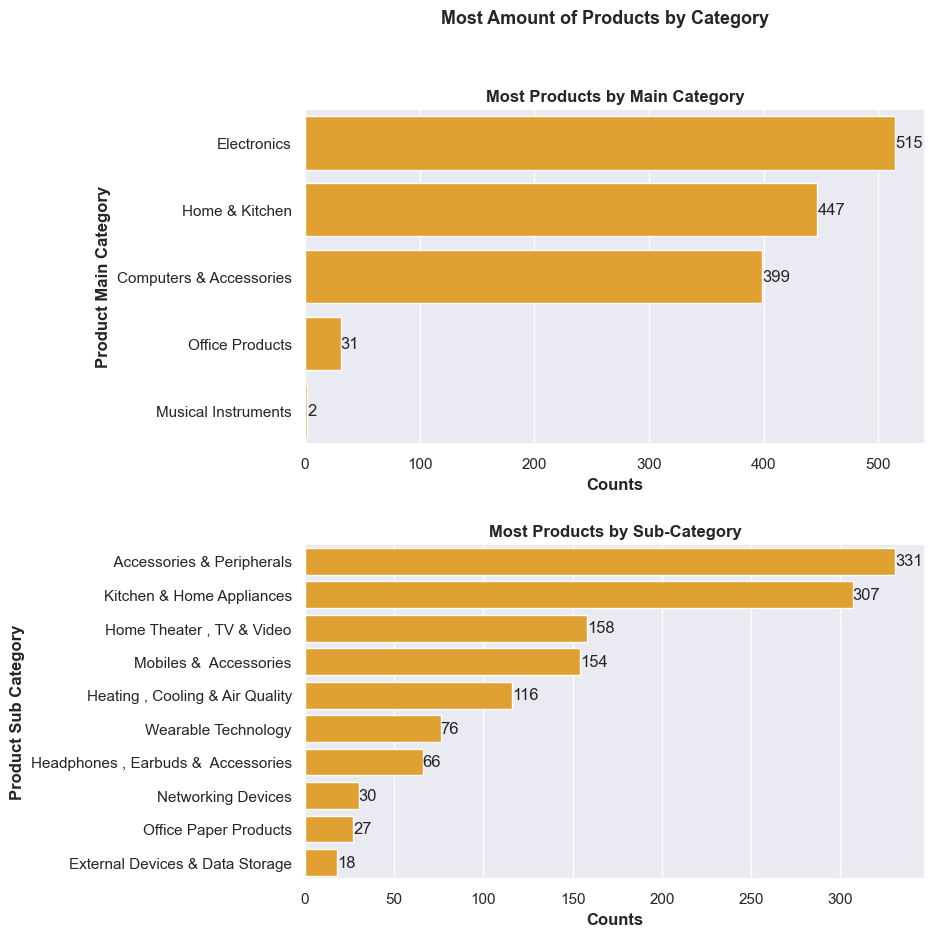

In [42]:
fig, ax = plt.subplots(2, 1, figsize = (8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='bold', fontsize=13)

most_main_items = df['main_category'].value_counts().head(5).rename_axis('Main Category').reset_index(name='Counts')
sns.barplot(ax=ax[0], data=most_main_items, x='Counts', y='Main Category', color='#fda715')
ax[0].set_xlabel('Counts', fontweight='bold', fontsize=12)
ax[0].set_ylabel('Product Main Category', fontweight='bold', fontsize=12)
ax[0].set_title('Most Products by Main Category', fontweight='bold', fontsize=12)
ax[0].bar_label(ax[0].containers[0])

most_sub_items = df['sub_category'].value_counts().head(10).rename_axis('Sub Category').reset_index(name='Counts')
sns.barplot(ax=ax[1], data=most_sub_items, x='Counts', y='Sub Category', color='#fda715')
ax[1].set_xlabel('Counts', fontweight='bold', fontsize=12)
ax[1].set_ylabel('Product Sub Category', fontweight='bold', fontsize=12)
ax[1].set_title('Most Products by Sub-Category', fontweight='bold', fontsize=12)
ax[1].bar_label(ax[1].containers[0])

plt.subplots_adjust(hspace = 0.3)
plt.show()

Dari 1399 jenis produk yang terjual di Amazon India, kategori Electronics berada di posisi pertama sebagai kategori yang paling banyak terjual, kemudian di posisi kedua ada kategori Home & Kitchen, dan di posisi ketiga yaitu Computers & Accessories. 

Sebanyak 515 jenis produk Electronics yang terjual, 447 jenis produk Home & Kitchen, serta 399 jenis produk Computers & Accessories.

- Sub kategori Electronics yang terjual paling banyak diantaranya adalah Home Theater, TV & Video; Mobiles & Accessories; Wearable  Technology; Headphones, Earbuds & Accessories. 
- Sub kategori Home & Kitchen yang terjual banyak yaitu Kitchen & Home Appliances; Heating, Cooling, & Air Quality. 
- Sub kategori Computers & Accessories yang terjual banyak diantaranya adalah Accessories & Peripherals; Networking Devices; External Devices & Data Storage. 

Sebagian besar produk yang terjual adalah produk yang terkait dengan perangkat listrik.

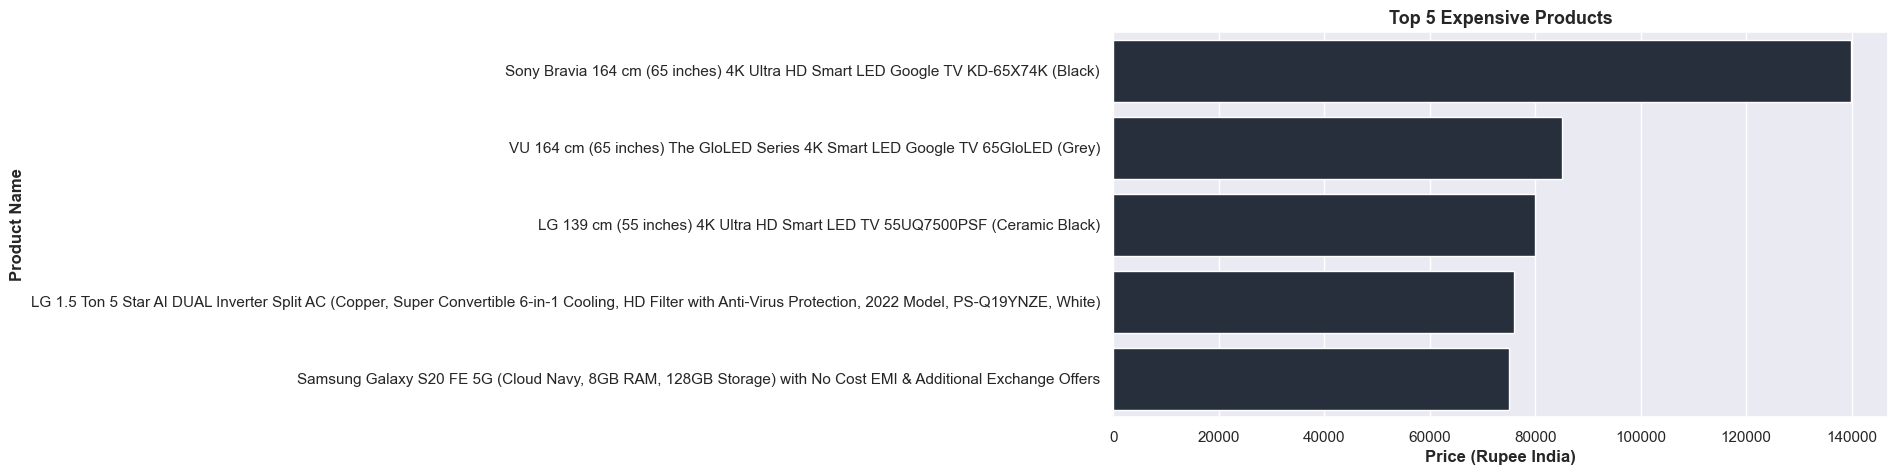

In [43]:
fig = plt.subplots(figsize = (10, 5))
actual_price_exp = sns.barplot(data = df.sort_values('actual_price', ascending=False).head(5), 
                               x='actual_price',
                               y='product_name',
                               color='#232F3E')
actual_price_exp.set_title('Top 5 Expensive Products', fontweight='bold', fontsize=13)
actual_price_exp.set_xlabel('Price (Rupee India)', fontweight='bold', fontsize=12)
actual_price_exp.set_ylabel('Product Name', fontweight='bold', fontsize=12)

plt.show()

Grafik di atas, menampilkan 5 produk yang terjual dengan harga paling mahal dan diantara ke 5 produk tersebut, produk termahal adalah Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) dengan harga  139.900 Rupee India.

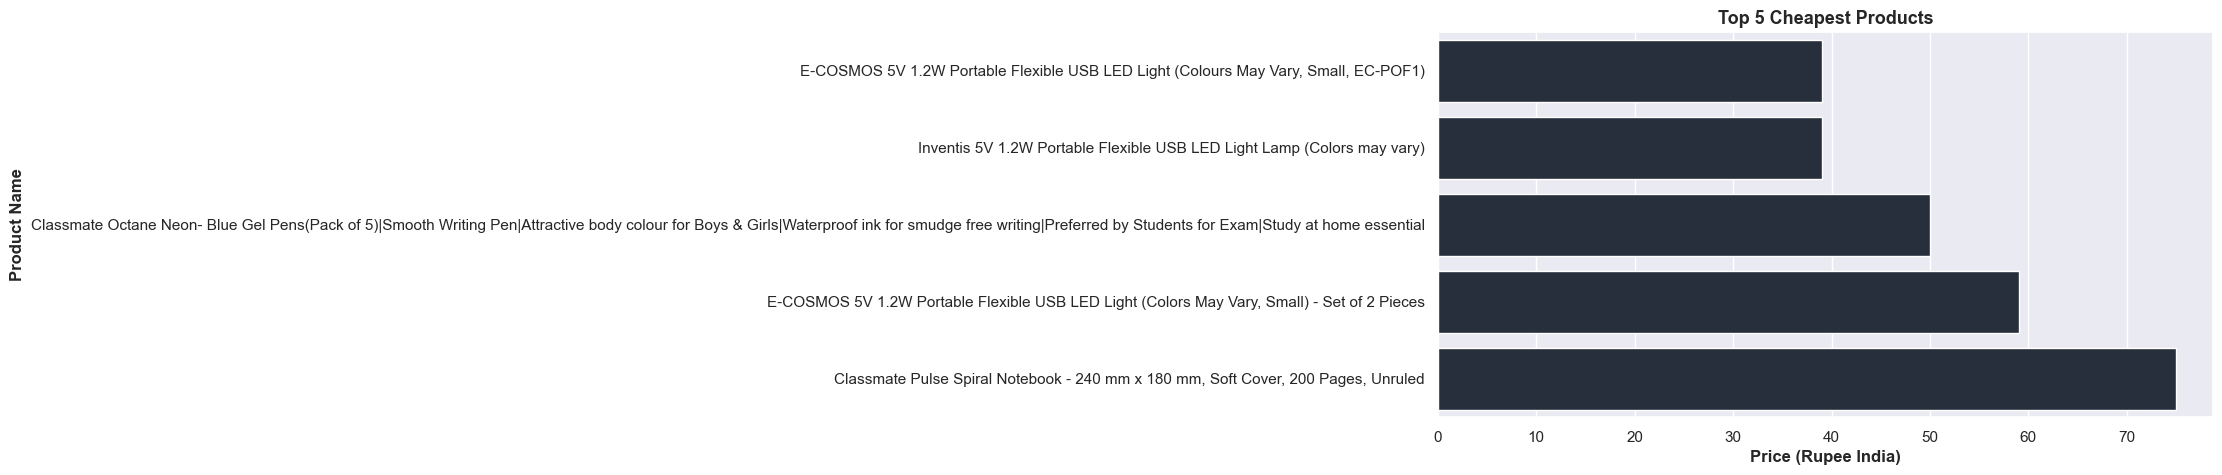

In [44]:
fig = plt.subplots(figsize = (10, 5))
disc_price_exp = sns.barplot(data = df.sort_values('actual_price', ascending=True).head(5),
                             x='actual_price',
                             y='product_name',
                             color='#232F3E')
disc_price_exp.set_title('Top 5 Cheapest Products', fontweight='bold', fontsize=13)
disc_price_exp.set_xlabel('Price (Rupee India)', fontweight='bold', fontsize=12)
disc_price_exp.set_ylabel('Product Name', fontweight='bold', fontsize=12)

plt.show()

Grafik di atas, menampilkan 5 produk yang terjual dengan harga paling murah dan diantara ke 5 produk tersebut, produk termurah adalah E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1) dengan harga 39 Rupee India.

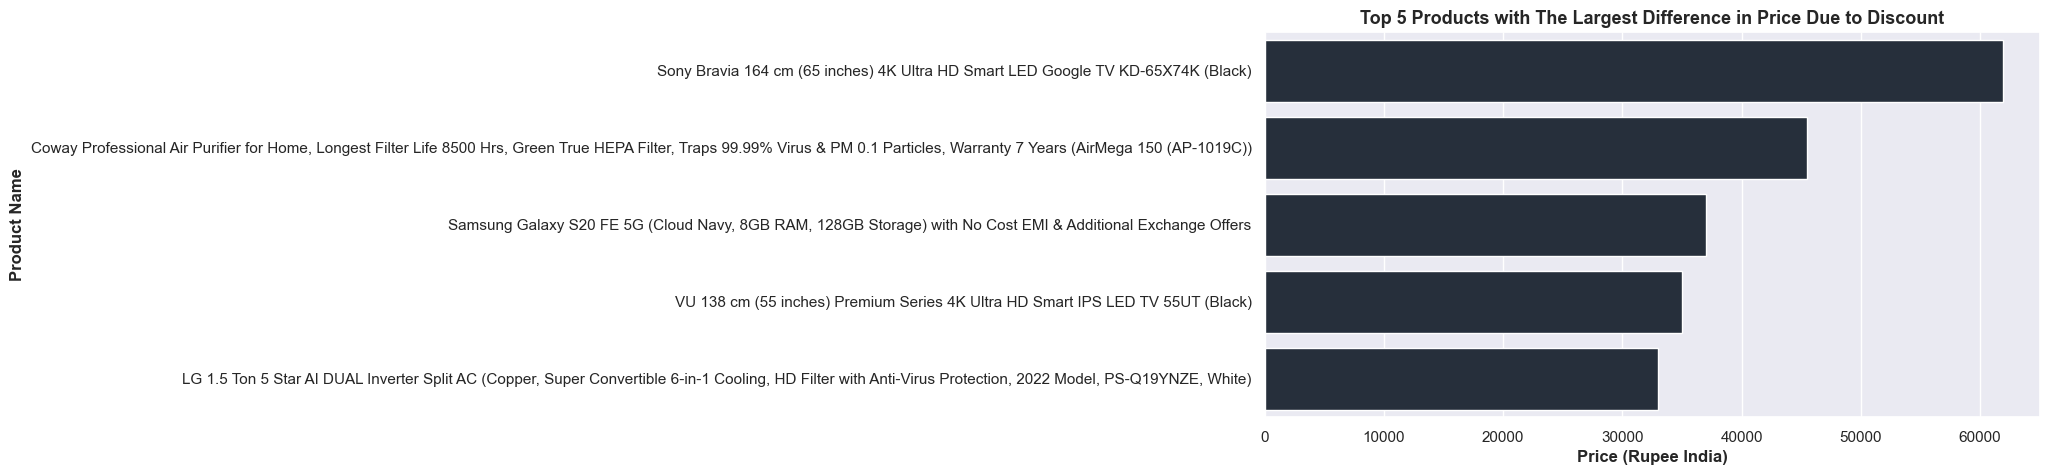

In [45]:
fig = plt.subplots(figsize = (10, 5))
largest_diff_price = sns.barplot(data = df.sort_values('difference_price', ascending =  False).head(5),
                                 x='difference_price',
                                 y='product_name',
                                 color='#232F3E')
largest_diff_price.set_title('Top 5 Products with The Largest Difference in Price Due to Discount', fontweight='bold', fontsize=13)
largest_diff_price.set_xlabel('Price (Rupee India)', fontweight='bold', fontsize=12)
largest_diff_price.set_ylabel('Product Name', fontweight='bold', fontsize=12)

plt.show()

Grafik di atas, menampilkan 5 produk yang memiliki selisih harga terbesar antara harga asli produk dengan harga produk ketika sudah mendapatkan diskon. Produk yang memiliki selisih harga terbesar tersebut adalah Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) dengan perbedaan harga sebesar 61.910 Rupee India.

C:\Users\User\AppData\Local\Temp\ipykernel_11088\1118900782.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = sns.heatmap(df.corr(),


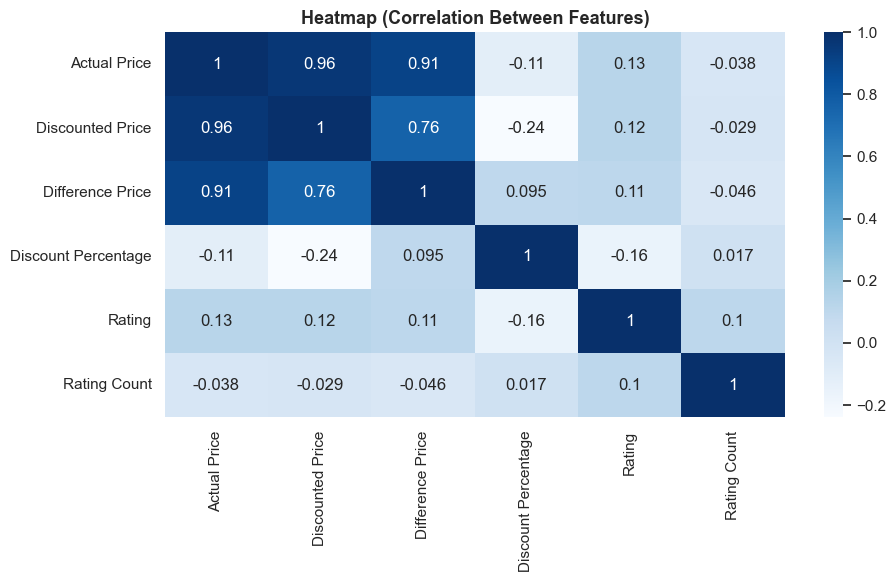

In [46]:
labels = ['Actual Price', 'Discounted Price', 'Difference Price', 'Discount Percentage', 'Rating', 'Rating Count']
fig = plt.subplots(figsize = (10, 5))
correlation = sns.heatmap(df.corr(), 
                          xticklabels = labels,
                          yticklabels = labels, 
                          annot = True,
                          cmap = sns.color_palette("Blues", as_cmap=True))
correlation.set_title('Heatmap (Correlation Between Features)', fontweight = 'bold', fontsize = 13)
plt.subplots_adjust(hspace = 0.3)

plt.show()

Berdasarkan heatmap tersebut diperoleh  :  

- Adanya hubungan positif antara harga asli (actual price) dan harga setelah diskon (discounted price). Terlihat dari angka korelasi yang diperoleh yaitu 0,96. Hal ini menandakan bahwa kedua hal tersebut berjalan bersamaan, ketika harga asli naik maka harga setelah diskon juga akan naik dan begitu pun sebaliknya. 
- Untuk hubungan antara harga asli (actual price) dan persentase diskon (discount percentage) bernilai negatif yaitu -0,11. Hal ini menandakan keduanya berlawanan, ketika harga naik, maka diskon yang akan diberikan kecil. 
- Adanya hubungan positif antara harga asli (actual price) dan penilaian (rating) dengan nilai korelasi yaitu 0,13. 
- Namun, hubungan antara harga asli (actual price) dan jumlah penilaian (rating count) bernilai negatif yaitu -0,038. Hal ini menandakan keduanya berlawanan, pada harga asli akan menghasilkan jumlah penilaian yang lebih sedikit, artinya lebih sedikit produk yang terjual. 
- Untuk hubungan persentase diskon (discount percentage) dengan penilaian (rating) bernilai negatif yaitu -0,16. Hal ini menandakan dengan persentase diskon yang besar, akan menurunkan penilaian (rating). 
- Namun, hubungan antara persentase diskon (discount percentage) dengan jumlah penilaian (rating count) bernilai positif yaitu 0,017. Hal ini menandakan dengan peningkatan diskon akan mengalami peningkatan juga jumlah produk yang terjual. 

Produk yang dijual dengan harga asli akan sedikit terjual, namun penilaian yang diberikan tinggi. Sedangkan produk yang dijual dengan harga diskon akan mendapatkan penilaian  rendah dan produk yang terjual lebih banyak. 

#### Discount Percentage

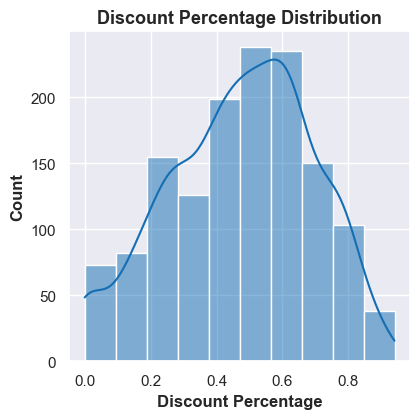

In [47]:
fig, ax = plt.subplots(figsize = (5, 5))
disc_percen =  sns.histplot(ax=ax, data=df, x='discount_percentage', bins=10, kde=True, color='#146EB4')
disc_percen.set_title('Discount Percentage Distribution', fontweight='bold', fontsize=13)
disc_percen.set_xlabel('Discount Percentage', fontweight='bold', fontsize=12)
disc_percen.set_ylabel('Count', fontweight='bold', fontsize=12)
fig.tight_layout(pad=3.0)

plt.show()

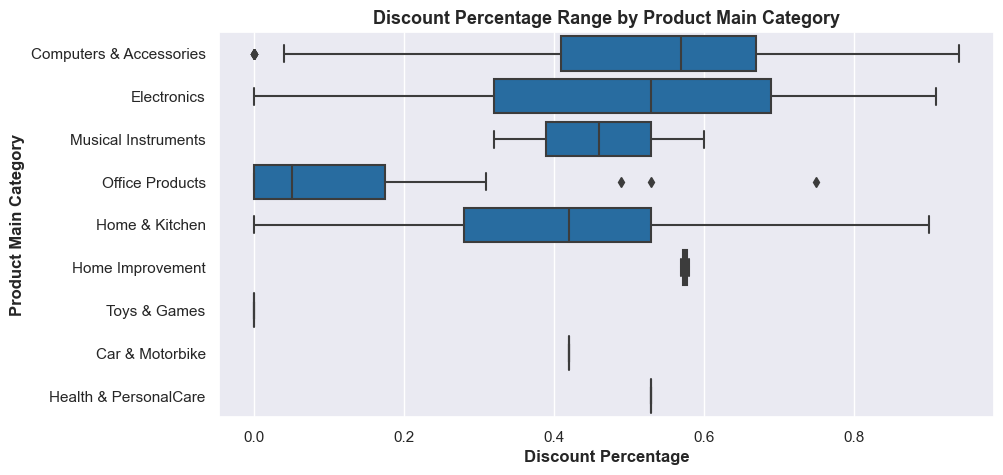

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data=df, x='discount_percentage', y='main_category', color='#146EB4')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='bold', fontsize=13)
ax.set_xlabel('Discount Percentage', fontweight='bold', fontsize=12)
ax.set_ylabel('Product Main Category', fontweight='bold', fontsize=12)

plt.show()

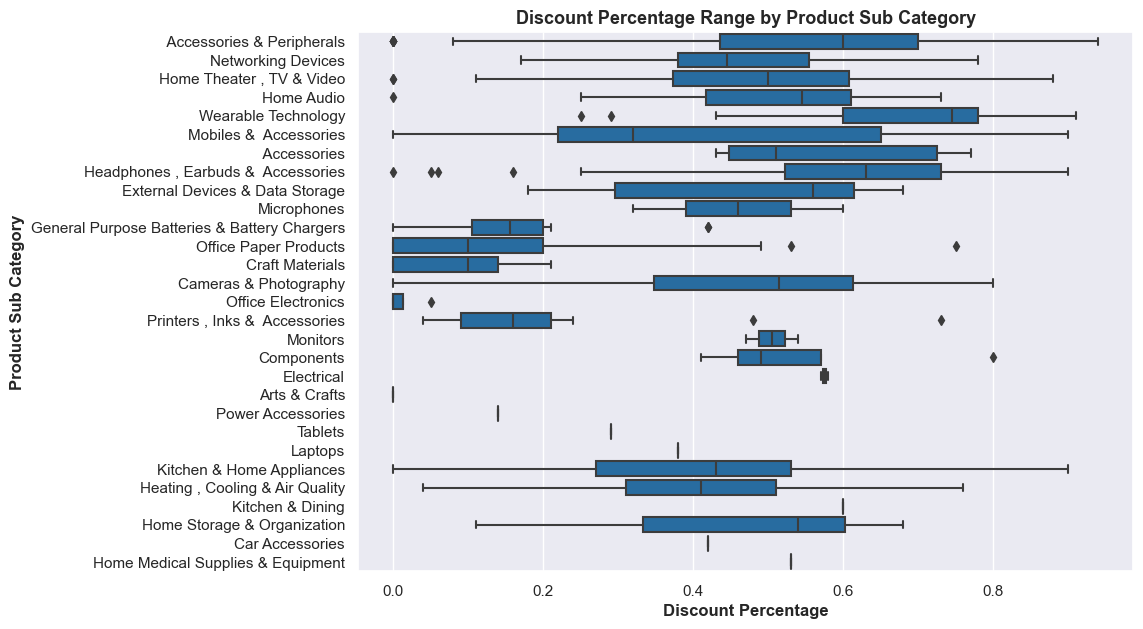

In [49]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(data=df, x='discount_percentage', y='sub_category', color='#146EB4')
ax.set_title('Discount Percentage Range by Product Sub Category', fontweight='bold', fontsize=13)
ax.set_xlabel('Discount Percentage', fontweight='bold', fontsize=12)
ax.set_ylabel('Product Sub Category', fontweight='bold', fontsize=12)

plt.show()

- Kebanyakan produk dalam dataset penjualan ini memiliki diskon sekitar 50% - 70%
- Kategori Computers & Accessories ; Electronics ; Home & Kitchen memiliki rentang diskon yang lebih lebar dan bervariasi antara minimal 0% sampai lebih dari 90 %
- Kategori Toys & Games ; Car & Motorbikes ; Health & PersonalCare; Home Improvement memiliki variasi diskon yang sedikit
- Pada kategori Computers & Accessories yang memiliki diskon paling lebar dan bervariasi yaitu sub kategori Accessories & Peripherals, sedangkan pada kategori Electronics yaitu sub kategori Mobiles & Accessories dan kategori Home & Kitchen yaitu sub kategori  Kitchen & Home Appliance

#### Rating Distribution

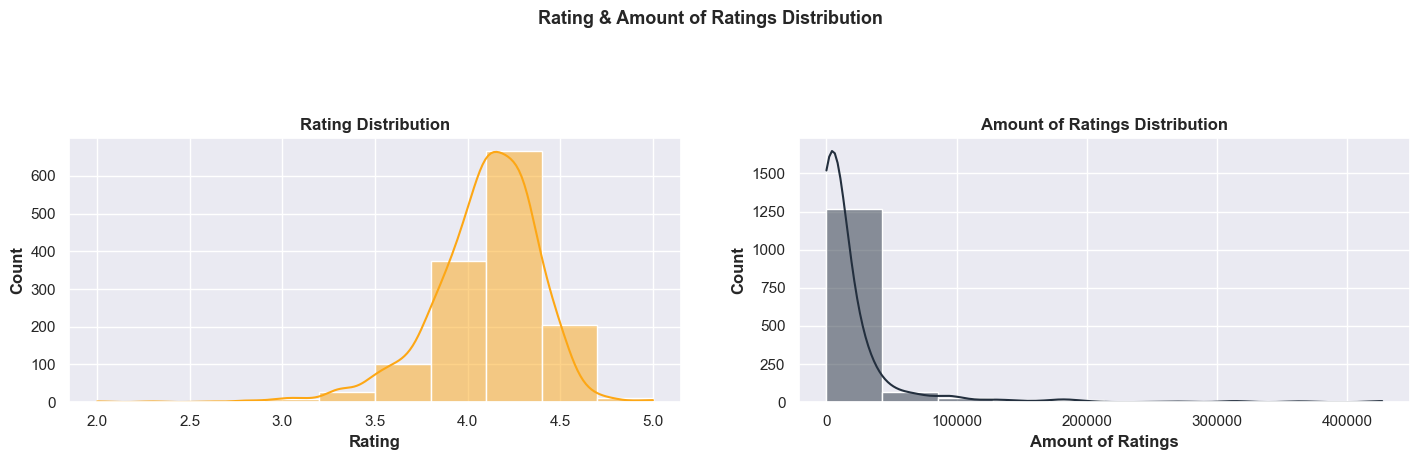

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('Rating & Amount of Ratings Distribution', fontweight = 'bold', fontsize = 13)

sns.histplot(ax=ax[0], data=df, x='rating', bins=10, color='#fda715', kde=True)
ax[0].set_xlabel('Rating', fontweight='bold', fontsize=12)
ax[0].set_ylabel('Count', fontweight='bold', fontsize=12)
ax[0].set_title('Rating Distribution', fontweight='bold', fontsize=12)

sns.histplot(ax=ax[1], data=df, x='rating_count', bins=10, color='#232F3E', kde=True)
ax[1].set_xlabel('Amount of Ratings', fontweight='bold', fontsize=12)
ax[1].set_ylabel('Count', fontweight='bold', fontsize=12)
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold', fontsize=12)

fig.tight_layout(pad=3)
plt.show()

- Berdasarkan grafik tersebut, rating produk banyak berkisar di antara 4,0 – 4,3 dan tidak adanya produk yang memiliki rating di bawah 2,0
- Jumlah rating pada setiap produk sangat bervariasi. Jumlah rating untuk setiap produk, paling banyak berkisar antara 0-5.000, sedangkan untuk jumlah rating produk tertinggi berada pada angka lebih dari 400.000 yaitu 426.973. Produk yang memiliki jumlah rating (rating count) tertinggi tersebut yaitu : 
    - Amazon Basics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
    - Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
    - Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black

Atau dengan kata lain, kabel HDMI adalah produk yang paling banyak terjual

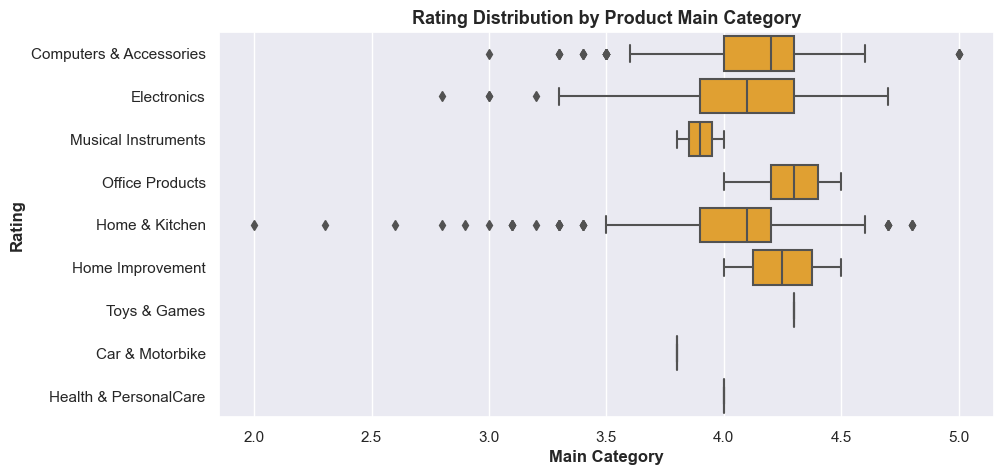

In [51]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data=df, x='rating', y='main_category', color='#fda715')
ax.set_title('Rating Distribution by Product Main Category', fontweight='bold', fontsize=13)
ax.set_xlabel('Main Category', fontweight='bold', fontsize=12)
ax.set_ylabel('Rating', fontweight='bold', fontsize=12)

plt.show()

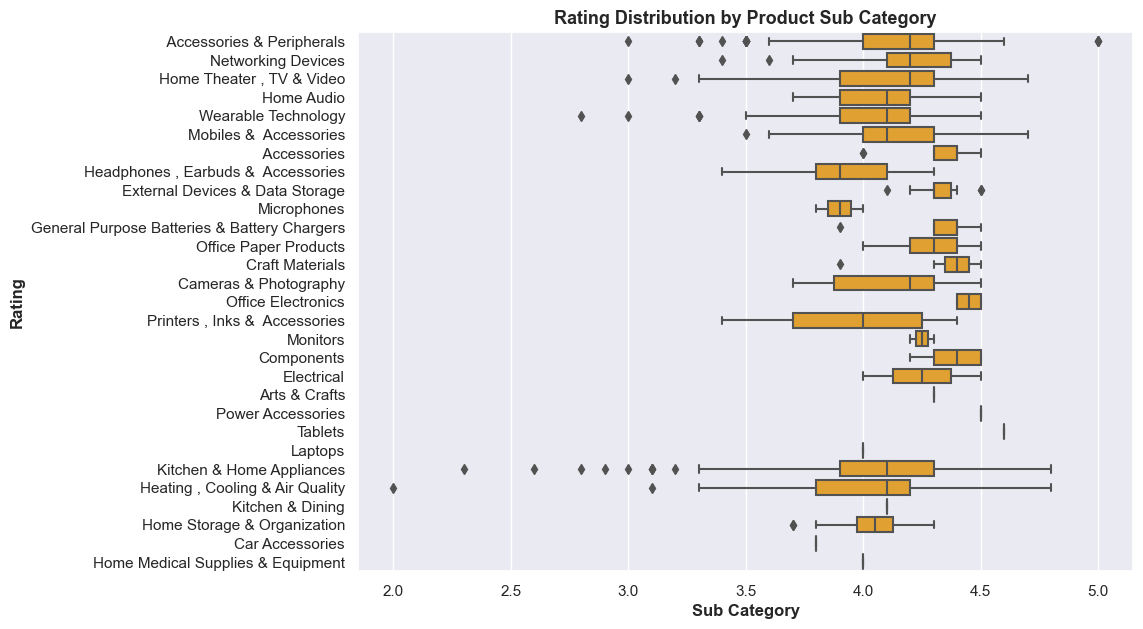

In [52]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot(data=df, x='rating', y='sub_category', color='#fda715')
ax.set_title('Rating Distribution by Product Sub Category', fontweight='bold', fontsize=13)
ax.set_xlabel('Sub Category', fontweight='bold', fontsize=12)
ax.set_ylabel('Rating', fontweight='bold', fontsize=12)

plt.show()

Berdasarkan grafik distribusi penilaian (rating) pada kategori utama : 

- Produk pada kategori Health & Personal Care ; Toys & Games ; Car & Motorbike memiliki penilaian yang seragam
- Produk dengan kategori Office Products ; Home Improvement ; Toys & Games; Health & Personal Care memiliki penilaian dengan kisaran minimal paling rendah yaitu 4,0    
- Produk dengan kisaran penilaian terlebar yaitu ada pada kategori Computers & Accessories ; Electronics ; Home & Kitchen. Ketegori Computers & Accessories memiliki kisaran penilaian tertinggi yaitu 3,0 – 5,0 
- Sedangkan kategori Home & Kitchen memiliki kisaran penilaian produk yang paling beragam mulai dari 2,0 – 4,8. Produk dengan penilaian paling rendah ada pada kategori Home & Kitchen
Berdasarkan grafik distribusi penilaian (rating) pada sub kategori :
- Produk sub kategori Accessories & Peripherals adalah sebagai penyumbang kisaran rating tertinggi pada kategori utama Computers & Accessories 
- Sedangkan produk sub kategori Heating, Cooling & Air Quality merupakan penyumbang rating terendah pada kategori utama Home & Kitchen

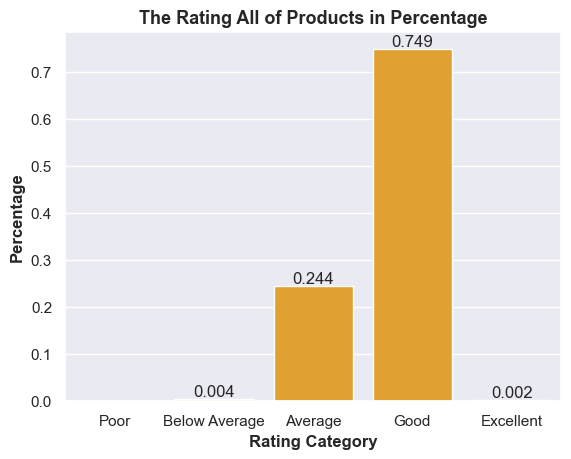

In [53]:
rating_ordered = ['Poor', 'Below Average', 'Average', 'Good', 'Excellent']

rating_count = df['rating_score'].value_counts(normalize=True).rename_axis('Rating').reset_index(name='Counts')

rating_count['Counts'] = rating_count['Counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='Rating', y='Counts', order=rating_ordered, color='#fda715')

rating_count_plot.set_xlabel('Rating Category', fontweight='bold', fontsize=12)
rating_count_plot.set_ylabel('Percentage', fontweight='bold', fontsize=12)
rating_count_plot.set_title('The Rating All of Products in Percentage', fontweight='bold', fontsize=13)

rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

Sebagian besar produk pada dataset penjualan ini memiliki penilaian di atas rata-rata dengan persentase 74,9 % yang bernilai baik. 

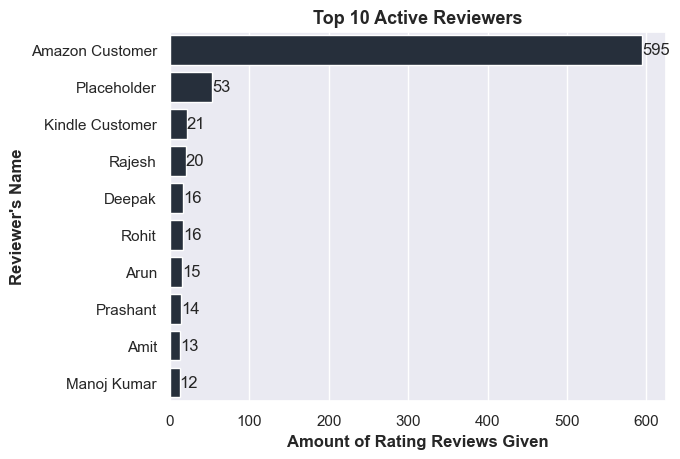

In [54]:
top_reviewers = df_reviewers['user_name'].value_counts().head(10).rename_axis('Name').reset_index(name='Counts')

top_reviewers_plot = sns.barplot(data=top_reviewers, x='Counts', y='Name', color='#232F3E')

top_reviewers_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold', fontsize=12)
top_reviewers_plot.set_ylabel("Reviewer's Name", fontweight='bold', fontsize=12)
top_reviewers_plot.set_title('Top 10 Active Reviewers', fontweight='bold', fontsize=13)

top_reviewers_plot.bar_label(top_reviewers_plot.containers[0])

plt.show()

Terdapat lebih dari 500 orang yang memberikan ulasan (review) terhadap suatu produk secara anonim, dengan mengatasnamakan sebagai Amazon Customer, Place Holder, and Kindle Customer.

## KESIMPULAN

- Produk dengan kategori electronics menempati posisi pertama sebagai produk yang paling banyak terjual, di posisi kedua ada kategori Home & Kitchen, dan di posisi ketiga ada kategori Computers & Accessories. Sebagian besar produk yang terjual adalah produk yang terkait dengan perangkat listrik.
- Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K adalah produk termahal yang berhasil terjual dengan harga 139.900 Rupee India. Namun, produk ini juga memiliki perbedaan harga yang jauh setelah diskon, dengan perbedaan harga yaitu 61.910 Rupee India. 
- Produk yang dijual dengan harga asli akan sedikit terjual, namun penilaian yang diberikan tinggi. Sedangkan produk yang dijual dengan harga diskon akan mendapatkan penilaian rendah dan produk yang terjual lebih banyak.
- Sebagian besar produk terjual dengan diskon sekitar 50% - 70%
- Sebagian besar penilaian (rating) produk berkisar di antara 4,0 – 4,3. Tidak ada produk yang memiliki penilaian (rating) di bawah 2,0. Penilaian (rating) terbanyak ada pada produk kabel HDMI artinya kabel HDMI adalah produk yang paling banyak terjual. 
- Produk dengan penilaian (rating) paling rendah ada pada kategori Home & Kitchen yang menjadi penyebabnya adalah adanya penilaian (rating) bernilai 2,0 pada sub kategori Heating, Cooling & Air Quality, sedangkan penilaian tertinggi ada pada kategori Computers & Accessories. 
- Namun 74,9 % penilaian terhadap produk adalah baik. 
- Lebih dari 500 orang yang memberikan ulasan (review) sebagai anonim. 

## REKOMENDASI

- Peningkatan penjualan dapat dilakukan pada ketiga kategori teratas yaitu Electronics; Home & Kitchen; Computers & Accessories, karena ketiga kategori tersebut paling sering dicari oleh konsumen. 
- Walaupun ketiga kategori ini memiliki penjualan yang tinggi karena ada faktor rentang diskon yang bervariasi antara 0% - 90%. Namun, tetap perlu adanya penjagaan kualitas produk, agar tidak berimbas terhadap penilaian (rating). Terutama di kategori Home & Kitchen yang memiliki penilaian (rating) terendah yaitu 2,0. 
- Tersedianya diskon yang beragam memang mampu meningkatkan penjualan. Akan tetapi, kualitas produk yang menurun dapat menyebabkan penilaian (rating) ikut menurun. Apabila penilaian (rating) menurun, konsumen dapat kehilangan kepercayaan, dengan hilangnya kepercayaan konsumen maka hal tersebut akan merugikan perusahaan. 